# YOLO methode voor kanker detectie

### Imports

In [80]:
# File usage
import shutil
import os

# Image loading
from PIL import Image
import cv2

# YOLO model
from ultralytics import YOLO

# Plotting
import matplotlib.pyplot as plt

## YOLO model

De ondestaande code chunks geven de code weer die is gebruikt om een YOLO model te maken dat kanker gezwellen kan herkennen. Deze code is kan gebruikt worden voor eigen kanker afbeeldingen (wanneer deze gemarkeerd zijn en hiervan de coördinaten bekend zijn) of voor andere doeleinden. De code kan waarschijnlijk niet direct worden overgenomen, vooral datapaden en bestandnamen zullen afwijken. Worden de meeste nodige mappen en bestanden automatisch aangemaakt, als maar de correcte data beschikbaar is.

De resultaten uit het model, gemaakt met de onderstaande code, zijn zichtbaar bij het kopje **Resultaten**. Hier wordt een beeld geschetst van wat het model kan opleveren.

In [81]:
patient_coords = {}
with open("coords-idc.txt", "r") as file:
    for line in file:
        line = line.strip()
        line = line.split(",")
        if not line[0] in patient_coords:
            patient_coords[line[0]] = []
        patient_coords[line[0]] += [line[1:]]

In [82]:
print(patient_coords)

{'8863': [['1092', '993', '1377', '1226'], ['1440', '986', '1736', '1275'], ['1585', '1393', '1870', '1727'], ['1126', '1519', '1425', '1664']], '8864': [['1807', '2092', '2570', '2487'], ['1616', '2562', '2489', '2845']], '8865': [['1688', '588', '2118', '772'], ['1995', '845', '2153', '1064']], '8867': [['543', '841', '1176', '1350']], '8913': [['341', '1183', '579', '1318'], ['636', '1150', '850', '1380'], ['743', '1425', '920', '1524'], ['657', '1598', '887', '1791']], '8914': [['2686', '1547', '3181', '1895']], '8916': [['116', '163', '411', '315'], ['864', '167', '1117', '264'], ['318', '918', '665', '1115'], ['364', '870', '516', '1019']], '8917': [['476', '251', '1498', '1111']], '8918': [['1275', '1231', '1517', '1414'], ['1485', '1128', '1724', '1267'], ['794', '1823', '1160', '2093'], ['1533', '1827', '1926', '1990']], '8950': [['429', '581', '930', '1003'], ['1471', '1277', '1768', '1571']], '8951': [['1291', '775', '1967', '1346']], '8955': [['1155', '549', '1619', '1263']

Maak de gewenste mappen structuur die in de code wordt gebruikt

In [83]:
os.makedirs("dataset/images/train", mode=0o777, exist_ok=True)
os.makedirs("dataset/images/val", mode=0o777, exist_ok=True)
os.makedirs("dataset/labels/train", mode=0o777, exist_ok=True)
os.makedirs("dataset/labels/val", mode=0o777, exist_ok=True)

Make the map datastructure

In [84]:
def make_line(coord, width, height):
    x_min = int(coord[0])
    x_max = int(coord[2])
    y_min = int(coord[1])
    y_max = int(coord[3])
    xcenter = (x_min+x_max)/(2*width)
    ycenter = (y_min+y_max)/(2*height)
    width_b = (x_max-x_min)/width
    height_b = (y_max-y_min)/height
    line = f"1 {xcenter} {ycenter} {width_b} {height_b}\n"
    return line

In [85]:
patients = os.listdir("complete_images")
counter = 0
for patient_file in patients:
    counter += 1
    patient = patient_file.split(".")[0]
    if not patient in patient_coords: 
        continue
    coords = patient_coords[patient]
    im = Image.open(f"complete_images/{patient_file}")
    width = im.width
    height = im.height
    if counter == 5:
        with open(f"dataset/labels/val/{patient}.txt", "w") as output:
            for coord in coords:
                line = make_line(coord, width, height)
                output.write(line)
        shutil.copy(f"complete_images/{patient_file}", f"dataset/images/val/{patient}.jpeg")
        counter = 0
    else:
        with open(f"dataset/labels/train/{patient}.txt", "w") as output:
            for coord in coords:
                line = make_line(coord, width, height)
                output.write(line)
        shutil.copy(f"complete_images/{patient_file}", f"dataset/images/train/{patient}.jpeg")

Make the yaml file

In [86]:
with open("dataset.yaml", "w") as output:
    output.write("train: /Users/gielb/Desktop/Bio-informatica/leerjaar_3_1/Beeldverwerking/dataset/images/train/\n")
    output.write("val: /Users/gielb/Desktop/Bio-informatica/leerjaar_3_1/Beeldverwerking/dataset/images/val/\n")
    output.write("\n")
    output.write("nc: 1\n")
    output.write("names: ['tumor']\n")

4 epoch = geen detectie, gehele file path, niet perse afronden, 

In [87]:
model = YOLO("yolov8n.pt")
model.train(data='dataset.yaml', epochs=10, single_cls=True)

Ultralytics 8.3.51  Python-3.10.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-1065G7 1.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

train: Scanning C:\Users\gielb\Desktop\Bio-informatica\leerjaar_3_1\Beeldverwerking\dataset\labels\train... 226 images, 0 backgrounds, 0 corrupt: 100%|██████████| 226/226 [00:01<00:00, 197.45it/s]


train: New cache created: C:\Users\gielb\Desktop\Bio-informatica\leerjaar_3_1\Beeldverwerking\dataset\labels\train.cache


val: Scanning C:\Users\gielb\Desktop\Bio-informatica\leerjaar_3_1\Beeldverwerking\dataset\labels\val... 51 images, 0 backgrounds, 1 corrupt: 100%|██████████| 51/51 [00:00<00:00, 245.96it/s]

val: WARNING  C:\Users\gielb\Desktop\Bio-informatica\leerjaar_3_1\Beeldverwerking\dataset\images\val\12906.jpeg: ignoring corrupt image/label: negative label values [-0.01490367 -0.35914212 -0.03647843 -0.22464558 -0.3882848 ]
val: New cache created: C:\Users\gielb\Desktop\Bio-informatica\leerjaar_3_1\Beeldverwerking\dataset\labels\val.cache
Plotting labels to runs\detect\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.771      4.113       2.69          6        640: 100%|██████████| 15/15 [01:55<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.34s/it]

                   all         50        152     0.0042      0.414     0.0111    0.00333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G       2.51      3.598      2.245          3        640: 100%|██████████| 15/15 [02:46<00:00, 11.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.59s/it]

                   all         50        152    0.00407      0.401     0.0426     0.0097



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       2.49      3.545      2.283          4        640: 100%|██████████| 15/15 [01:39<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.55s/it]

                   all         50        152    0.00433      0.428     0.0254    0.00642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.509      3.292      2.159          5        640: 100%|██████████| 15/15 [01:33<00:00,  6.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.61s/it]

                   all         50        152     0.0042      0.414    0.00899    0.00229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.511      3.199      2.023          4        640: 100%|██████████| 15/15 [01:32<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.50s/it]

                   all         50        152      0.208      0.125      0.065     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.557        3.1      2.139          4        640: 100%|██████████| 15/15 [01:36<00:00,  6.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.23s/it]

                   all         50        152      0.175      0.164     0.0937     0.0238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.414      2.938      2.076          4        640: 100%|██████████| 15/15 [01:40<00:00,  6.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.01s/it]

                   all         50        152      0.191      0.151     0.0728     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.376       2.91      2.048          6        640: 100%|██████████| 15/15 [01:38<00:00,  6.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         50        152      0.178      0.224      0.119     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.334      2.898      1.945          3        640: 100%|██████████| 15/15 [01:44<00:00,  6.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.02s/it]

                   all         50        152       0.23      0.158     0.0977     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.306       2.79      1.913          3        640: 100%|██████████| 15/15 [01:48<00:00,  7.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.63s/it]

                   all         50        152       0.24      0.185      0.128     0.0416



10 epochs completed in 0.336 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.51  Python-3.10.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-1065G7 1.30GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.22s/it]


                   all         50        152      0.178      0.224      0.119     0.0446
Speed: 3.0ms preprocess, 102.2ms inference, 0.0ms loss, 28.0ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000029B87CC1F00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.048048

In [96]:
best_model = YOLO("runs/detect/train/weights/best.pt")

In [97]:
example_image = [f"dataset/images/val/{file}" for file in os.listdir("dataset/images/val")]
results = best_model.predict(example_image[:10], save=True, conf=0.5)


0: 640x640 7 tumors, 89.5ms
1: 640x640 4 tumors, 89.5ms
2: 640x640 4 tumors, 89.5ms
3: 640x640 (no detections), 89.5ms
4: 640x640 (no detections), 89.5ms
5: 640x640 4 tumors, 89.5ms
6: 640x640 6 tumors, 89.5ms
7: 640x640 2 tumors, 89.5ms
8: 640x640 2 tumors, 89.5ms
9: 640x640 1 tumor, 89.5ms
Speed: 3.4ms preprocess, 89.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3


In [91]:
image = cv2.imread(example_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   
for result in results:
    for box in result.boxes:
        xmin, ymin, xmax, ymax = map(int, box.xyxy[0].tolist())
        confidence = box.conf[0]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(image, f"{confidence:.2f}", (xmin, ymin - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
 
output_path = "output_image.jpg"  
cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

True

## Resultaten

De onderstaande resultaten zijn gemaakt met de bovenstaande code. Deze afbeeldingen zijn te vinden in de results folder op de github pagina (https://github.com/DemiOever/casus_d). De volgende resultaten dienen alleen als demonstratie van mogelijkheden met het gemaakte model.

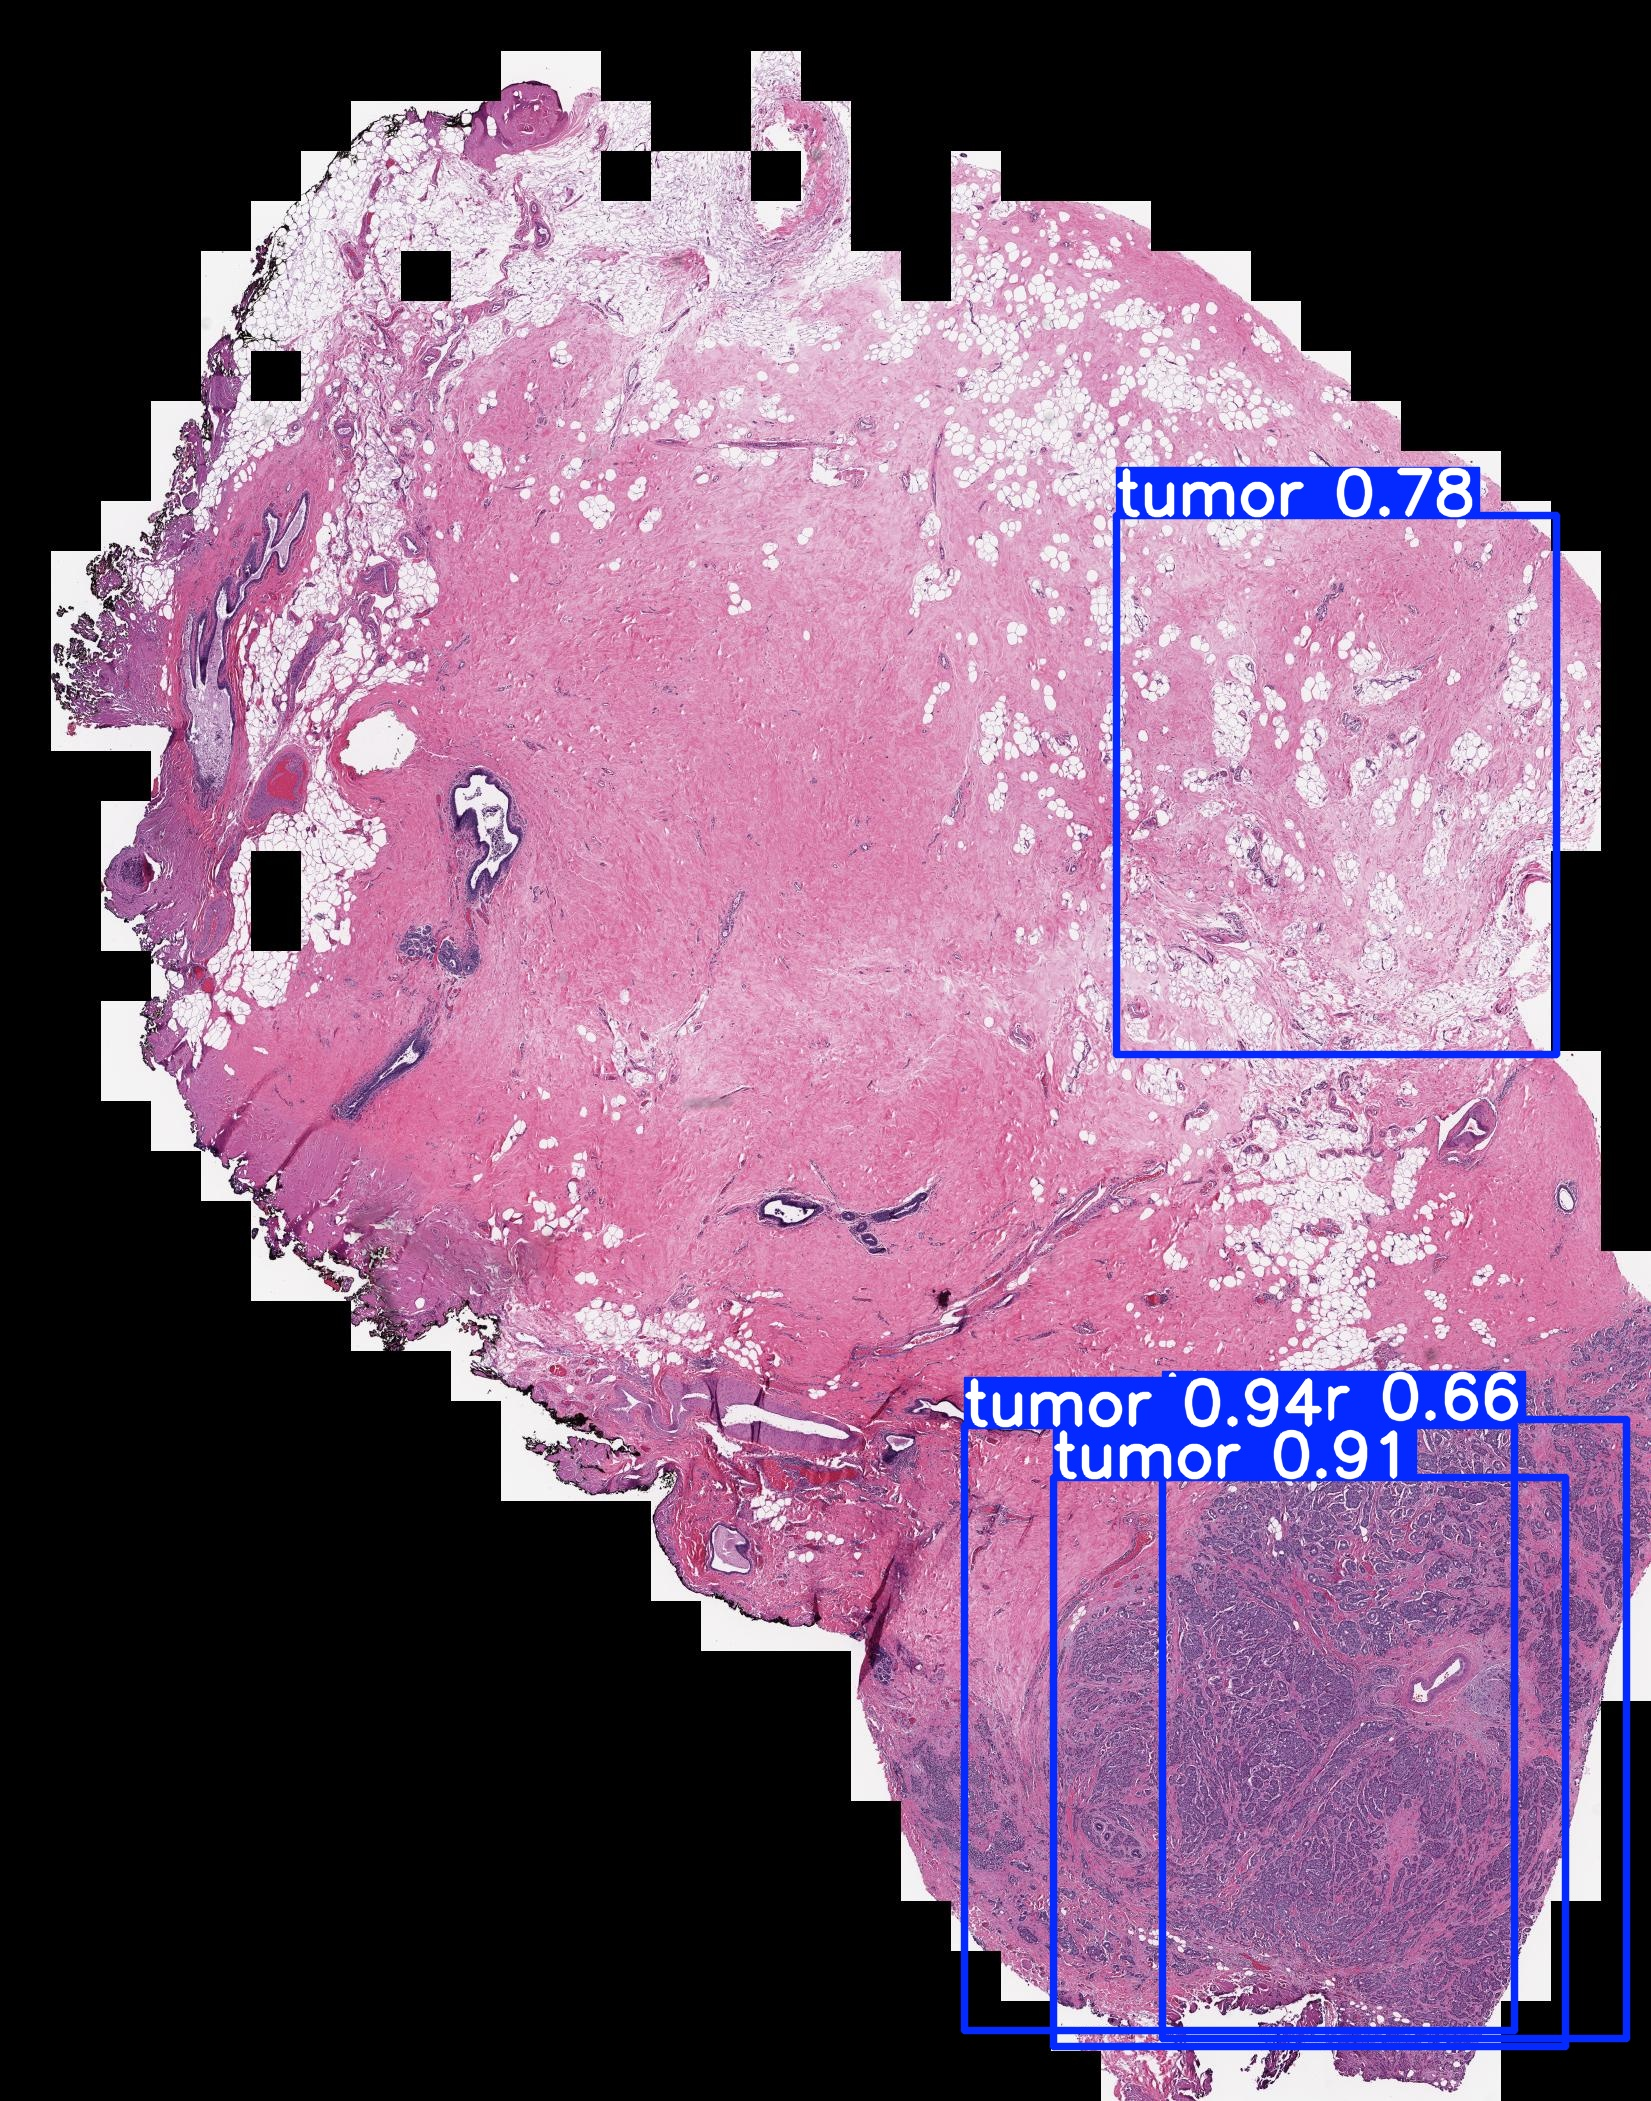

In [117]:
im = Image.open("results/10295.jpg")
im
# plt.imshow(im)
# plt.axis('off')
# plt.show()